In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
# Check basic info
df.info()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values
df = df.dropna(subset=['price', 'NAME'])  # Example: drop rows missing key info
df.fillna({'reviews_per_month': 0}, inplace=True)

# Remove outliers
df = df[df['price'] < df['price'].quantile(0.95)]

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

/tmp/ipython-input-2808221115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'reviews_per_month': 0}, inplace=True)


In [5]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,9.642800e+04,9.642800e+04,96420.00000,96420.000000,96340.000000,96237.000000,96428.000000,96202.000000,96050.000000,96253.000000,81415,81429.000000,96130.000000,96125.000000,96012.000000
mean,2.919603e+07,4.926770e+10,40.72810,-73.949723,0.498049,2012.484045,596.417617,119.262261,8.100843,27.508795,2019-06-11 09:35:51.510163968,1.376456,3.280797,7.923381,141.077480
min,1.001254e+06,1.236005e+08,40.49979,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.509092e+07,2.461721e+10,40.68872,-73.982583,0.000000,2007.000000,324.000000,65.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.919708e+07,4.914285e+10,40.72228,-73.954450,0.000000,2012.000000,596.000000,119.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.330710e+07,7.398280e+10,40.76282,-73.932520,1.000000,2017.000000,871.000000,174.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.91697,-73.705220,1.000000,2022.000000,1142.000000,228.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000
std,1.627166e+07,2.852468e+10,0.05592,0.049533,0.499999,5.767231,314.896909,62.975431,30.466248,49.550090,NaN,1.754366,1.286201,32.257002,134.992346


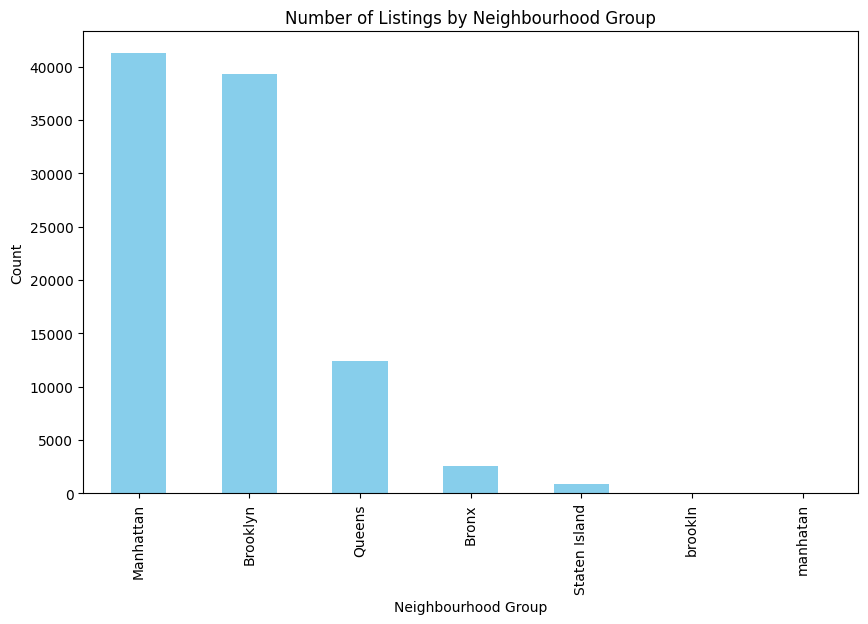

In [7]:
plt.figure(figsize=(10,6))
df['neighbourhood group'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

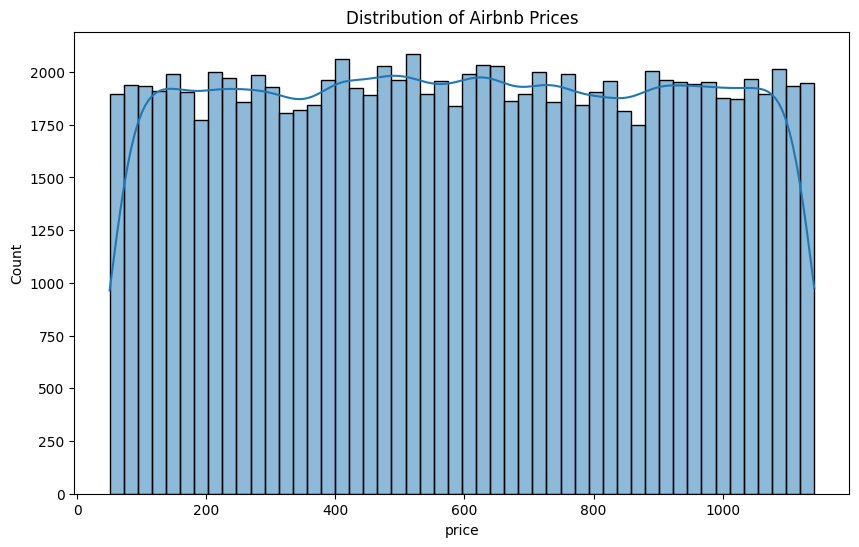

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices')
plt.show()

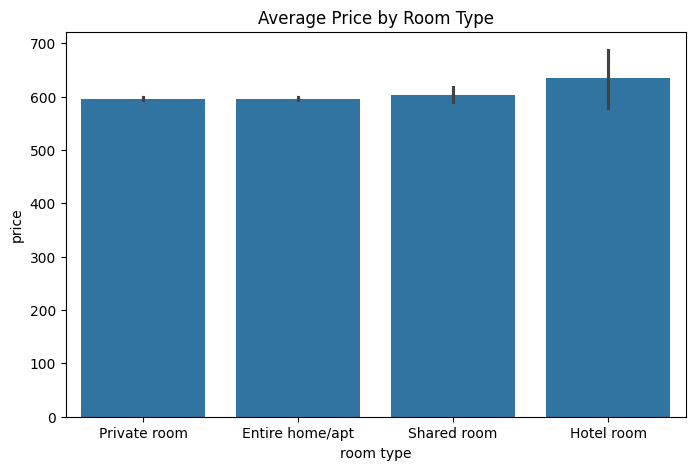

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x='room type', y='price', data=df, estimator=np.mean)
plt.title('Average Price by Room Type')
plt.show()

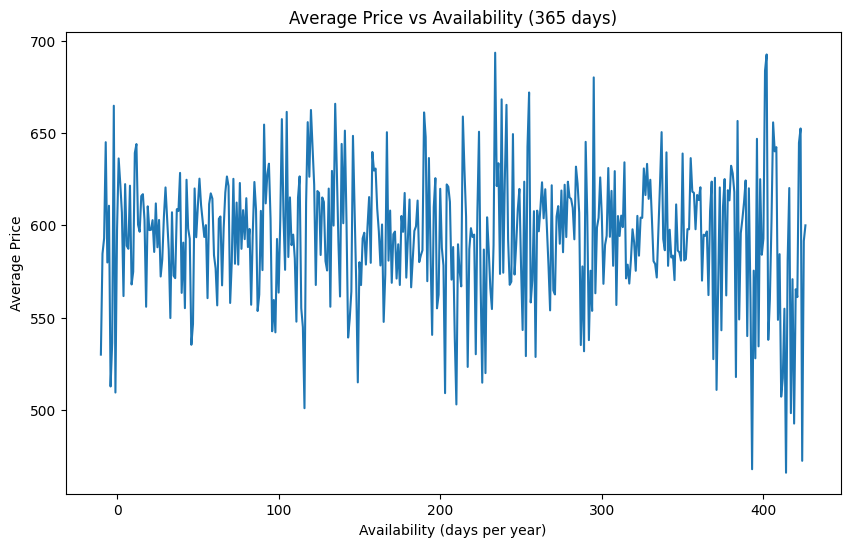

In [13]:
availability_price = df.groupby('availability 365')['price'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(availability_price['availability 365'], availability_price['price'])
plt.title('Average Price vs Availability (365 days)')
plt.xlabel('Availability (days per year)')
plt.ylabel('Average Price')
plt.show()

/tmp/ipython-input-3258195263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room type', y='number of reviews', data=avg_reviews, palette='Set2')


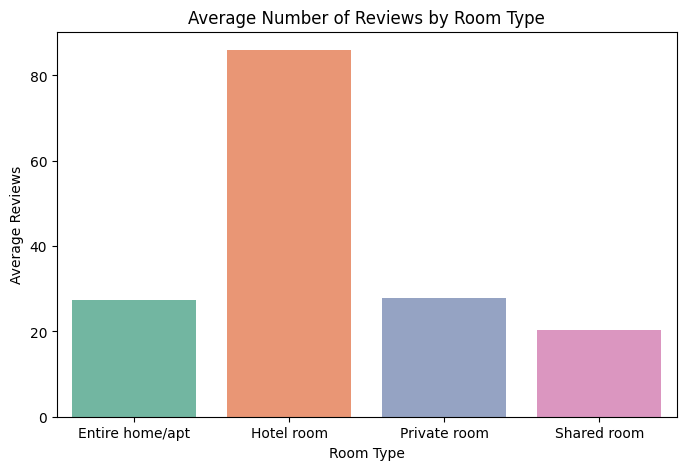

In [15]:
avg_reviews = df.groupby('room type')['number of reviews'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='room type', y='number of reviews', data=avg_reviews, palette='Set2')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews')
plt.show()

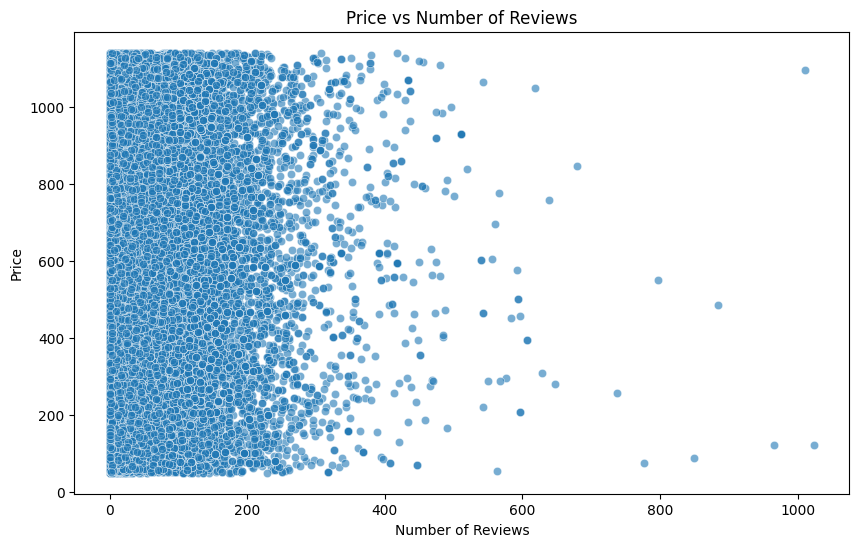

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='number of reviews', y='price', data=df, alpha=0.6)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

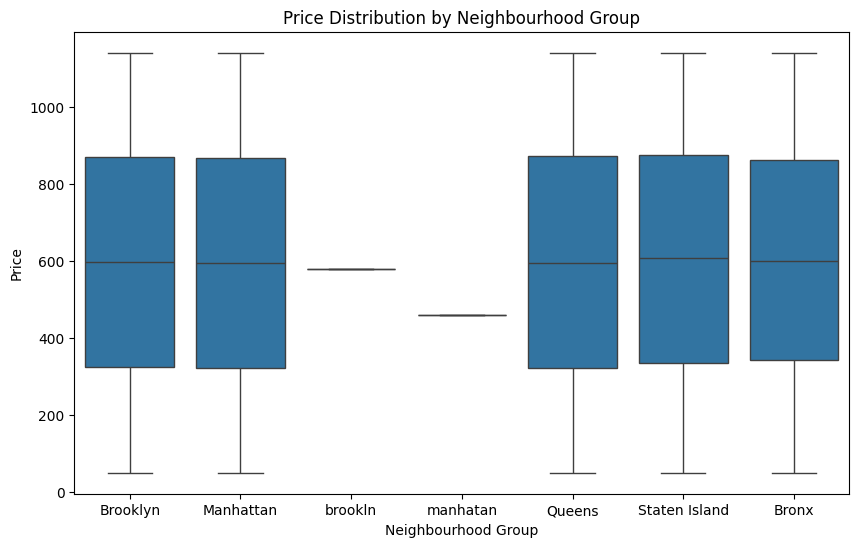

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()